In [1]:
import pandas as pd
import numpy as np

In [306]:
df = pd.read_csv('dfnitro3v2.csv', index_col = 0)
df.set_index('new_date', inplace = True)

In [307]:
df.shape

(67040, 55)

In [308]:
#Lets do some initial cleaning from eyeballing duplicate columns 

In [309]:
#Drop Cloud_cover, HUC12, Fips_, windspeed, winddirection 
df = df.drop(columns = ['CloudCover', 'HUC12', 'FIPS_', 'WindDirection', 'WindSpeed', 'Method', 'min', 'hour', 'SampleId'])


#Reasons
#CloudCover, winddirection and windspeed are repeats of the narr data
#HUC12 is a repeat of HUC12_
#Fips is the combination of State and County CODE 
#Method of collection shouldn't be important for total nitrogen
#min and hour don't seem as important here 
#drop sampleID

In [310]:
#Change numericals into categoricals.  For Dates usually use them as numeric when we are doing time series. 
#https://support.minitab.com/en-us/minitab/19/help-and-how-to/statistics/tables/supporting-topics/basics/categorical-and-quantitative-variables/

In [312]:
#Change some numericals to categorical variables 
df['HUC12_'] = df['HUC12_'].apply(lambda x: str(x))
df['month'] = df['month'].apply(lambda x: str(x))
df['year'] = df['year'].apply(lambda x: str(x))
df['dayofweek'] = df['dayofweek'].apply(lambda x: str(x))
df['quarter'] = df['quarter'].apply(lambda x: str(x))
df['week'] = df['week'].apply(lambda x: str(x))

In [313]:
#https://stats.stackexchange.com/questions/297196/would-longitude-latitude-be-considered-discrete-or-continuous-data
#keep longitude and latitude as numerical 

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67040 entries, 2019-03-24 12:28:00 to 2016-11-08 09:00:00
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude         67040 non-null  float64
 1   Longitude        67040 non-null  float64
 2   SampleDepth      67040 non-null  float64
 3   HUC12_           67040 non-null  object 
 4   COUNTY_          67040 non-null  object 
 5   STATE_           67040 non-null  object 
 6   areaacres        67040 non-null  float64
 7   za_mean          66896 non-null  float64
 8   lc_11            66896 non-null  float64
 9   lc_21            66896 non-null  float64
 10  lc_22            66896 non-null  float64
 11  lc_23            66896 non-null  float64
 12  lc_24            66896 non-null  float64
 13  lc_31            66896 non-null  float64
 14  lc_41            66896 non-null  float64
 15  lc_42            66896 non-null  float64
 16  lc_43            66896 non-null

In [315]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import explained_variance_score


#Scalers 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [316]:
df.columns

Index(['Latitude', 'Longitude', 'SampleDepth', 'HUC12_', 'COUNTY_', 'STATE_',
       'areaacres', 'za_mean', 'lc_11', 'lc_21', 'lc_22', 'lc_23', 'lc_24',
       'lc_31', 'lc_41', 'lc_42', 'lc_43', 'lc_52', 'lc_71', 'lc_81', 'lc_82',
       'lc_90', 'lc_95', 'month', 'year', 'week', 'dayofweek', 'quarter', 'DO',
       'TN', 'TP', 'airtemp_narr', 'precip3_narr', 'humidity_narr',
       'cl_cover_narr', 'sfc_runoff', 'sfc_air_narr', 'u_wind_narr',
       'v_wind_narr', 'windspeed_narr', 'wdirection_narr', 'precip24_narr',
       'precip48_narr', 'PH', 'SA', 'of_dist'],
      dtype='object')

In [317]:
df.columns

Index(['Latitude', 'Longitude', 'SampleDepth', 'HUC12_', 'COUNTY_', 'STATE_',
       'areaacres', 'za_mean', 'lc_11', 'lc_21', 'lc_22', 'lc_23', 'lc_24',
       'lc_31', 'lc_41', 'lc_42', 'lc_43', 'lc_52', 'lc_71', 'lc_81', 'lc_82',
       'lc_90', 'lc_95', 'month', 'year', 'week', 'dayofweek', 'quarter', 'DO',
       'TN', 'TP', 'airtemp_narr', 'precip3_narr', 'humidity_narr',
       'cl_cover_narr', 'sfc_runoff', 'sfc_air_narr', 'u_wind_narr',
       'v_wind_narr', 'windspeed_narr', 'wdirection_narr', 'precip24_narr',
       'precip48_narr', 'PH', 'SA', 'of_dist'],
      dtype='object')

In [318]:
#Feature imputation must do a train test split
#Let us split the numeric and categorical variables to first to see what we need to drop

In [319]:
#Feature Selection 

In [320]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels = ['TN'], axis =1), df['TN'], test_size = 0.3, random_state = 0)

In [321]:
#Numerics
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(X_train.select_dtypes(include = numerics).columns)
X_train_n = X_train[numerical_vars]

In [322]:
X_train_n.shape

(46928, 37)

In [323]:
#Variability Threshold 

In [324]:
#Looking for Quasi-Constant observations that dont' show much variability. 
sel = VarianceThreshold(threshold = 0.001)
sel.fit(X_train_n)

VarianceThreshold(threshold=0.001)

In [325]:
#Features not quasiconstant 
sum(sel.get_support())

33

In [326]:
#These Features are quasi-constant and should be dropped 
[x for x in X_train_n.columns if x not in X_train_n.columns[sel.get_support()]]

['lc_24', 'lc_31', 'lc_52', 'lc_71']

In [327]:
#Drop lc_24, lc_31, lc_52, lc_71

In [328]:
#Correlation Test

In [329]:
corrmat = X_train_n.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending = False)
corrmat = corrmat[corrmat >= 0.85]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,wdirection_narr,u_wind_narr,1.000000
1,u_wind_narr,wdirection_narr,1.000000
2,airtemp_narr,sfc_air_narr,0.965616
3,sfc_air_narr,airtemp_narr,0.965616
4,lc_22,lc_23,0.931414


In [330]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_features_ls:
        
        #find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(correlated_block.feature2.unique()) + [feature]
        
        #append the block of features to the list
        correlated_groups.append(correlated_block)
        
print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 10 correlated groups
out of 45 total features


In [331]:
#now we can visualize each group. We see that some groups 
for group in correlated_groups:
    print(group)
    print()
    print()

           feature1     feature2      corr
0   wdirection_narr  u_wind_narr  1.000000
10  wdirection_narr  v_wind_narr  0.924755


      feature1         feature2      corr
1  u_wind_narr  wdirection_narr  1.000000
8  u_wind_narr      v_wind_narr  0.924755


       feature1      feature2      corr
2  airtemp_narr  sfc_air_narr  0.965616


       feature1      feature2      corr
3  sfc_air_narr  airtemp_narr  0.965616


  feature1 feature2      corr
4    lc_22    lc_23  0.931414


   feature1 feature2      corr
5     lc_23    lc_22  0.931414
13    lc_23    lc_24  0.886836


   feature1 feature2      corr
6  Latitude  of_dist  0.928557


  feature1  feature2      corr
7  of_dist  Latitude  0.928557


       feature1         feature2      corr
9   v_wind_narr      u_wind_narr  0.924755
11  v_wind_narr  wdirection_narr  0.924755


   feature1 feature2      corr
12    lc_24    lc_23  0.886836




In [332]:
#We can screen using a randomforest first feature group
features = ['u_wind_narr'] + ['wdirection_narr'] + ['v_wind_narr']
rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train_n[features].fillna(0), y_train)

RandomForestRegressor(random_state=0)

In [333]:
#get feature importance attributed by random forest model

importance = pd.concat([pd.Series(features),
                       pd.Series(rf.feature_importances_)], axis = 1)

importance.columns = ['feature', 'importance']
importance.sort_values(by = 'importance', ascending = False)

,feature,importance
0,u_wind_narr,0.401671
1,wdirection_narr,0.335684
2,v_wind_narr,0.262646


In [334]:
#keep u_wind_narr

In [335]:
#We can screen using a randomforest second feature group 
features = ['lc_22'] + ['lc_23'] + ['lc_24']  
rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train_n[features].fillna(0), y_train)

RandomForestRegressor(random_state=0)

In [336]:
#get feature importance attributed by random forest model

importance = pd.concat([pd.Series(features),
                       pd.Series(rf.feature_importances_)], axis = 1)

importance.columns = ['feature', 'importance']
importance.sort_values(by = 'importance', ascending = False)

,feature,importance
0,lc_22,0.539931
2,lc_24,0.263884
1,lc_23,0.196185


In [337]:
#Keep lc_22

In [338]:
#We can screen using a randomforest second feature group 
features = ['Latitude'] + ['of_dist']
rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train_n[features].fillna(0), y_train)

RandomForestRegressor(random_state=0)

In [339]:
#get feature importance attributed by random forest model

importance = pd.concat([pd.Series(features),
                       pd.Series(rf.feature_importances_)], axis = 1)

importance.columns = ['feature', 'importance']
importance.sort_values(by = 'importance', ascending = False)

,feature,importance
0,Latitude,0.512237
1,of_dist,0.487763


In [340]:
#Keep Latitude 

In [341]:
#Telling to drop of_dist, lc_23, lc_24, wdirection_narr, v_wind_narr

In [342]:
#Mutual Information measures the dependence of 2 variables
#Deteremines how similar join distribution p(X,y) is to the product of individual distributions p(x)p(y)
#If x and y are independent MI is zero 

In [343]:
#Mutual Information
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [344]:
mi = mutual_info_regression(X_train_n.fillna(0), y_train)
mi

array([0.88938402, 0.84263035, 0.28660368, 0.51847533, 0.87505275,
       0.68295352, 0.83455179, 0.78311231, 0.73549916, 0.62637786,
       0.6910042 , 0.77035746, 0.68917466, 0.80781216, 0.74041556,
       0.73759581, 0.73826529, 0.77471001, 0.71135398, 0.6133086 ,
       0.09032141, 0.29740602, 0.0404193 , 0.01114313, 0.02390815,
       0.00512355, 0.16469487, 0.04781872, 0.01713929, 0.02855415,
       0.02167878, 0.01713976, 0.03708031, 0.03654142, 0.01775062,
       0.09156502, 0.87492659])

In [345]:
mi = pd.Series(mi)
mi.index = X_train_n.columns
mi.sort_values(ascending = False)

Latitude           0.889384
za_mean            0.875053
of_dist            0.874927
Longitude          0.842630
lc_21              0.834552
lc_43              0.807812
lc_22              0.783112
lc_82              0.774710
lc_41              0.770357
lc_52              0.740416
lc_81              0.738265
lc_71              0.737596
lc_23              0.735499
lc_90              0.711354
lc_31              0.691004
lc_42              0.689175
lc_11              0.682954
lc_24              0.626378
lc_95              0.613309
areaacres          0.518475
TP                 0.297406
SampleDepth        0.286604
sfc_runoff         0.164695
SA                 0.091565
DO                 0.090321
sfc_air_narr       0.047819
airtemp_narr       0.040419
precip24_narr      0.037080
precip48_narr      0.036541
v_wind_narr        0.028554
humidity_narr      0.023908
windspeed_narr     0.021679
PH                 0.017751
wdirection_narr    0.017140
u_wind_narr        0.017139
precip3_narr       0

In [346]:
plt.style.use('fivethirtyeight')

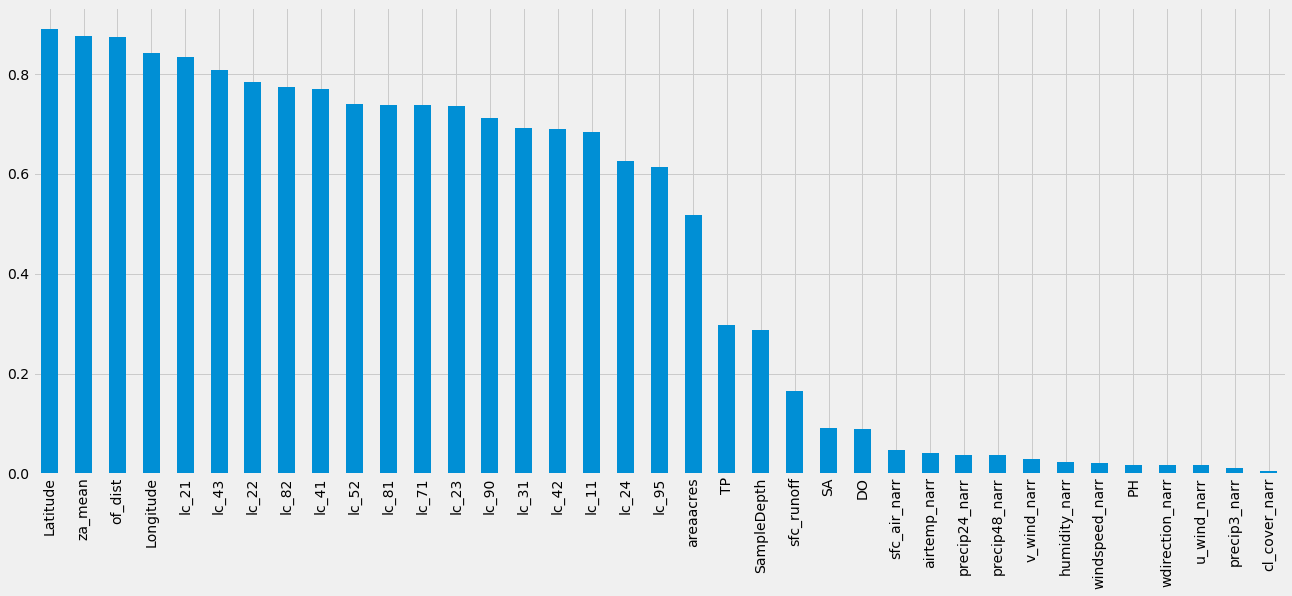

In [347]:
#Barplot
mi.sort_values(ascending = False).plot.bar(figsize = (20,8));


In [348]:
#Might want to drop everything after dissolved Oxygen 

In [349]:
#Lets use SelectKBest and SelectPercentile
#SelectKBest determines how many features to use, while percentile chooses within certain percentile 

In [350]:
sel_ = SelectKBest(mutual_info_regression, k = 20).fit(X_train_n.fillna(0), y_train)
X_train_n.columns[sel_.get_support()] #True False Vector what to keep with True and what to eliminate with False 

Index(['Latitude', 'Longitude', 'areaacres', 'za_mean', 'lc_11', 'lc_21',
       'lc_22', 'lc_23', 'lc_24', 'lc_31', 'lc_41', 'lc_42', 'lc_43', 'lc_52',
       'lc_71', 'lc_81', 'lc_82', 'lc_90', 'lc_95', 'of_dist'],
      dtype='object')

In [351]:
sel_p = SelectPercentile(mutual_info_regression, percentile = 0.05).fit(X_train_n.fillna(0), y_train)
X_train_n.columns[sel_p.get_support()]

Index(['Latitude'], dtype='object')

#### What to Drop so far 
    DO                 0.092647
    SA                 0.089290
    sfc_air_narr       0.047796
    airtemp_narr       0.040444
    precip24_narr      0.037211
    precip48_narr      0.036821
    v_wind_narr        0.028399
    humidity_narr      0.023878
    PH                 0.022037
    windspeed_narr     0.021779
    wdirection_narr    0.017109
    u_wind_narr        0.017065
    precip3_narr       0.005507
    cl_cover_narr      0.001648

HighCorrelation or low explaination 

    lc_24
    lc_23
    lc_31
    lc_52
    lc_71

In [352]:
#MSE with DecisionTreeClassifier

In [353]:
from sklearn.tree import DecisionTreeRegressor

In [354]:
mse_values = []
for feature in X_train_n.columns:
    clf = DecisionTreeRegressor()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    mse_values.append(mean_squared_error(y_test, y_scored))

In [355]:
mse_values = pd.Series(mse_values)
mse_values.index = X_train_n.columns
mse_values.sort_values(ascending = False)

airtemp_narr       15.267492
windspeed_narr     14.660988
DO                 14.161411
SA                 14.120906
PH                 14.100977
cl_cover_narr      14.091117
precip3_narr       13.912113
SampleDepth        13.836204
TP                 13.566937
sfc_runoff         13.299213
of_dist            10.418910
precip48_narr      10.353202
Longitude           9.396732
Latitude            9.367966
precip24_narr       7.749881
sfc_air_narr        7.704277
lc_24               7.416926
lc_31               7.235953
lc_42               7.233319
lc_41               7.232993
lc_43               7.231452
lc_82               7.230906
lc_95               7.227195
lc_23               7.225606
lc_22               7.223858
lc_71               7.223097
lc_90               7.223061
za_mean             7.221241
lc_11               7.217836
lc_21               7.206932
lc_52               7.206297
lc_81               7.204280
areaacres           7.198298
v_wind_narr         6.475146
u_wind_narr   

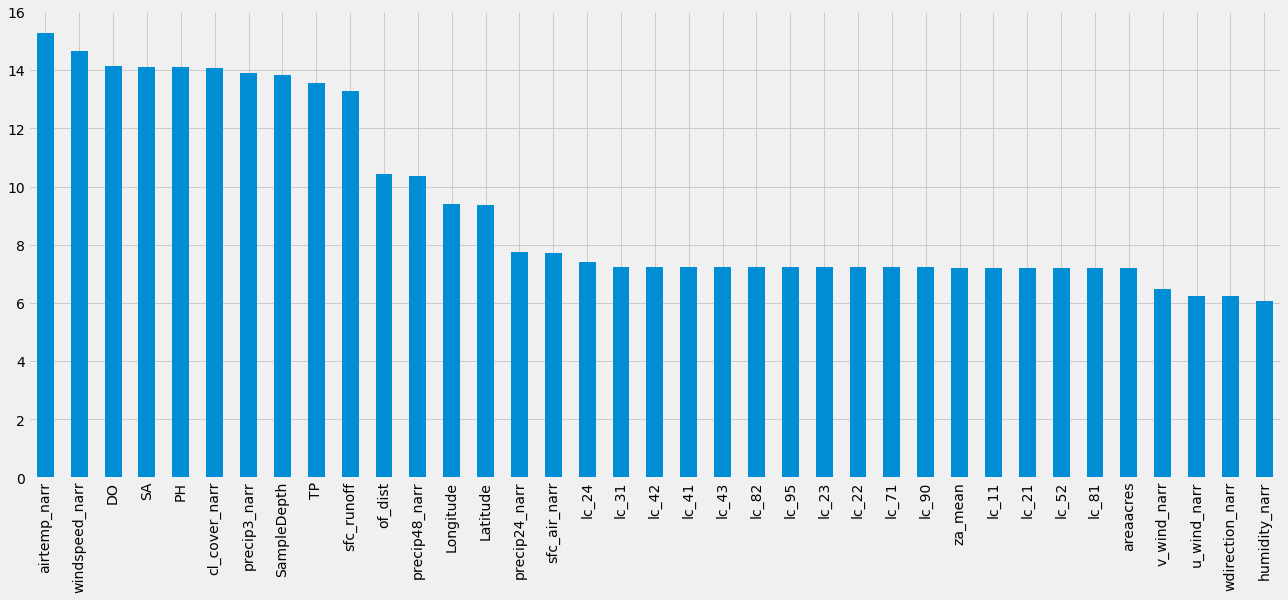

In [356]:
mse_values.sort_values(ascending = False).plot.bar(figsize = (20,8));

In [357]:
X_train = X_train.drop(columns = ['of_dist', 'lc_24', 'lc_23', 'wdirection_narr', 'v_wind_narr', 'lc_31', 'lc_52', 'lc_71', 'DO', 'SA', 'sfc_air_narr',
                                 'airtemp_narr', 'precip24_narr', 'precip48_narr', 'v_wind_narr', 'humidity_narr', 'PH', 'windspeed_narr', 'wdirection_narr',
                                 'u_wind_narr', 'precip3_narr', 'cl_cover_narr'])
X_test = X_test.drop(columns = ['of_dist', 'lc_24', 'lc_23', 'wdirection_narr', 'v_wind_narr', 'lc_31', 'lc_52', 'lc_71', 'DO', 'SA', 'sfc_air_narr',
                                 'airtemp_narr', 'precip24_narr', 'precip48_narr', 'v_wind_narr', 'humidity_narr', 'PH', 'windspeed_narr', 'wdirection_narr',
                                 'u_wind_narr', 'precip3_narr', 'cl_cover_narr'])

In [358]:
X_train.columns

Index(['Latitude', 'Longitude', 'SampleDepth', 'HUC12_', 'COUNTY_', 'STATE_',
       'areaacres', 'za_mean', 'lc_11', 'lc_21', 'lc_22', 'lc_41', 'lc_42',
       'lc_43', 'lc_81', 'lc_82', 'lc_90', 'lc_95', 'month', 'year', 'week',
       'dayofweek', 'quarter', 'TP', 'sfc_runoff'],
      dtype='object')

In [359]:
#Categoricals Chi-Score Fischer Score 

In [360]:
# #Numerics
# objects = ['object']
# cat_vars = list(X_train.select_dtypes(include = objects).columns)
# X_train_c = X_train[cat_vars]

In [361]:
# def mean_encoding(df_train, df_test):
#     df_train_temp = df_train.copy()
#     df_test_temp = df_test.copy()
    
#     for col in X_train_c:
#         risk_dict = df_train.groupby([col])[]

In [372]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
scaler = MinMaxScaler()
imp_mean_scaler = make_pipeline(imp_mean, scaler)
imp_constant = SimpleImputer(strategy='constant', fill_value='missing')
ohe = OneHotEncoder(handle_unknown='ignore')
imp_ohe = make_pipeline(imp_constant, ohe)

In [373]:
ct = make_column_transformer(
    (imp_mean_scaler, ['Latitude', 'Longitude', 'SampleDepth',
       'areaacres', 'za_mean', 'lc_11', 'lc_21', 'lc_22', 'lc_41',
       'lc_42', 'lc_43', 'lc_81', 'lc_82', 'lc_90', 'lc_95', 'TP', 'sfc_runoff']),
    (imp_ohe, ['COUNTY_', 'STATE_',  'month', 'year', 'week', 'dayofweek', 'quarter', 'HUC12_']),
    remainder='passthrough')

In [374]:
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
#Scaler Information 

In [375]:
rf = RandomForestRegressor(verbose = True, n_jobs = -1)
pipe = make_pipeline(ct, rf)

In [376]:
pipe.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Latitude', 'Longitude',
                                                   'SampleDepth', 'areaacres',
                                                   'za_mean', 'lc_11', 'lc_21',
                                                   'lc_22', 'lc_41', 'lc_42',
                                                   'lc_43', 'lc_81', 'lc_82',
                                                   'lc_90', 'lc_95', 'TP',
                                  

In [377]:
y_pred = pipe.predict(X_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [378]:
mean_squared_error(y_pred, y_test)

1.716994480996073

In [379]:
explained_variance_score(y_pred, y_test)

0.8735277035798993

In [380]:
for col, score in zip(X_train.columns, pipe['randomforestregressor'].feature_importances_):
    print(col,score)

Latitude 0.058891571439926696
Longitude 0.04667175871836493
SampleDepth 0.02345163525357097
HUC12_ 0.0026187810790493
COUNTY_ 0.01031523165216498
STATE_ 0.0274028185314356
areaacres 0.022539063037782737
za_mean 0.0021547322813659994
lc_11 0.0022535215125278067
lc_21 0.002612437283168659
lc_22 0.015851599892236935
lc_41 0.0017413603519173381
lc_42 0.041538132480447604
lc_43 0.0063451698803186855
lc_81 0.0044055677285205356
lc_82 0.012232431277629472
lc_90 5.0316182475655995e-05
lc_95 2.078523985500111e-06
month 1.1356785465775522e-07
year 4.324428547964281e-06
week 1.8993319417296458e-07
dayofweek 1.2853893813231078e-07
quarter 2.7973621666690238e-05
TP 2.14768024184917e-06
sfc_runoff 5.59773049853286e-05
